In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read data
data = pd.read_csv('data.csv')

In [2]:
#preprocessing
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

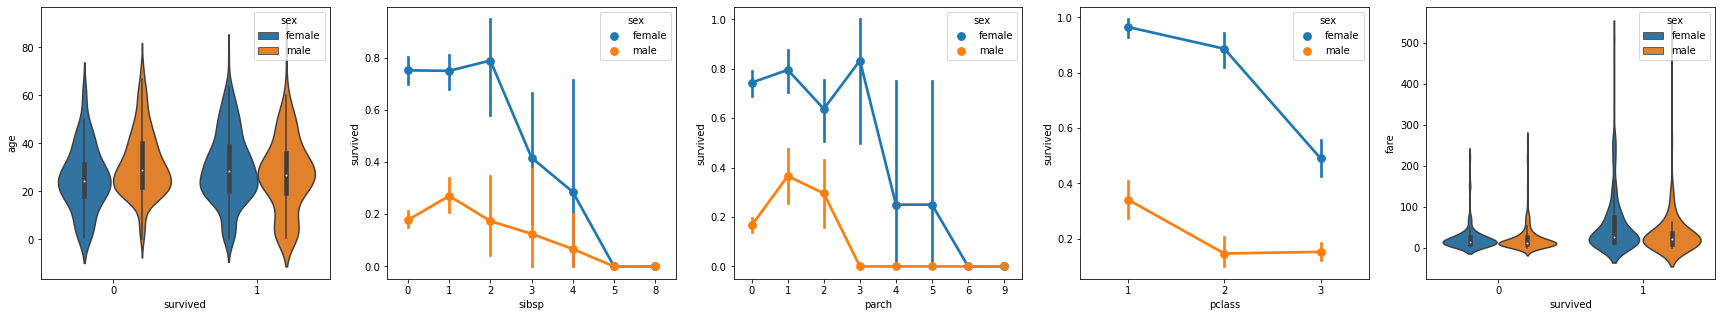

In [3]:
#plotting raw data
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
#encoding gender feature
data.replace({'male': 1, 'female': 0}, inplace=True)

In [5]:
#correlation of features on target
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [6]:
#combining sibsp and parch features to represent all relatives
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:
#getting rid of empties
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
data.shape

(1045, 6)

In [8]:
#splitting data into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [9]:
#normalizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [10]:
#applying GaussianNB model on split data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predict_test = model.predict(X_test)

In [11]:
#confusion matrix and metrics on GaussianNB model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, predict_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,predict_test)))
print('Precision Score : ' + str(precision_score(y_test,predict_test, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,predict_test, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,predict_test, average='weighted')))

Confusion Matrix : 
[[106  22]
 [ 31  50]]
Accuracy Score : 0.7464114832535885
Precision Score : 0.7429975901931339
Recall Score : 0.7464114832535885
F1 Score : 0.7432592175626231


In [12]:
#applying LinearSVC model on split data
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=5000)
model.fit(X_train, y_train)
predict_test = model.predict(X_test)

In [13]:
#confusion matrix and metrics on LinearSVC model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, predict_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,predict_test)))
print('Precision Score : ' + str(precision_score(y_test,predict_test, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,predict_test, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,predict_test, average='weighted')))

Confusion Matrix : 
[[108  20]
 [ 24  57]]
Accuracy Score : 0.7894736842105263
Precision Score : 0.7879823525756541
Recall Score : 0.7894736842105263
F1 Score : 0.7884282273356225


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predict_test = model.predict(X_test)

In [15]:
#confusion matrix and metrics on Logistic Regression model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, predict_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,predict_test)))
print('Precision Score : ' + str(precision_score(y_test,predict_test, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,predict_test, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,predict_test, average='weighted')))

Confusion Matrix : 
[[111  17]
 [ 24  57]]
Accuracy Score : 0.8038277511961722
Precision Score : 0.8020877336666811
Recall Score : 0.8038277511961722
F1 Score : 0.8020087125589137
